In [1]:
%load_ext autoreload

%autoreload 2
import matplotlib.pyplot as plt
import pickle, glob
from astropy.coordinates import SkyCoord, match_coordinates_3d, match_coordinates_sky
import sys
import numpy as np
import astropy.units as u
from astropy.table import Table, QTable, hstack, vstack
import corner
import recover_fits

In [2]:
sys.path.append('../modules')
from _analysis_scaling_relation import config

--- WLxN ---
--- N ---
--- WL ---
--- MxN ---
--- M ---


In [3]:
config.keys()

dict_keys(['WL', 'WLxN', 'M', 'MxN', 'N'])

In [4]:
fit = 'MxN'
name_plot = [config[fit][i]['name_plot'] for i in range(len(config[fit]))]

In [5]:
name_plot
index_plot = np.arange(len(name_plot))

In [6]:
name_plot

['nfw - Duffy08',
 'nfw - Diemer15',
 'nfw - Prada12',
 'nfw - Bhattacharya13',
 'nfw - Diemer15 (2h)',
 'nfw - Bocquet16',
 'BPZ',
 'FleXZBoost',
 'nfw + Cov($\\Delta\\Sigma,\\lambda$)']

In [7]:
p_M, p_err_M, name_plot_M = recover_fits.best_fit(config, 'WL')
p_MN, p_err_MN, name_plot_MN = recover_fits.best_fit(config, 'WLxN')
p_N, p_err_N, name_plot_N = recover_fits.best_fit(config, 'N')

['MCMC_fit_m-r_WL_1-halo=nfw+c-M=Duffy08_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WL_1-halo=nfw+c-M=Diemer15_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WL_1-halo=nfw+c-M=Prada12_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WL_1-halo=nfw+c-M=Bhattacharya13_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WL_1-halo=nfw+c-M=Diemer15_+2-halo_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WL_1-halo=nfw+c-M=Diemer15_photoz=Truez_hmf=Bocquet16', 'MCMC_fit_m-r_WL_1-halo=nfw+c-M=Diemer15_photoz=BPZ_hmf=Despali16', 'MCMC_fit_m-r_WL_1-halo=nfw+c-M=Diemer15_photoz=flex_hmf=Despali16', 'MCMC_fit_m-r_WL_1-halo=nfw+c-M=Diemer15+cov(g,richness)_photoz=Truez_hmf=Despali16']
['MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Diemer15_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Prada12_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Bhattacharya13_photoz=Truez_hmf=Despali16', 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Diemer15_+2-halo_

In [8]:
fiducial = np.load('fiducial.pkl.npy')

In [9]:
fiducial_params = {str(i):np.mean(fiducial[:,i], axis=0) for i in range(6)}
fiducial_params_err = {str(i):np.std(fiducial[:,i], axis=0) for i in range(6)}

In [10]:
fiducial_params_err

{'0': 0.012115238317021985,
 '1': 0.06884533744248614,
 '2': 0.03985363020221398,
 '3': 0.009005740330636247,
 '4': 0.03970559960157871,
 '5': 0.013806057889847194}

In [11]:
fiducial_params

{'0': 3.341979743103244,
 '1': 0.08931268870422608,
 '2': 2.259975707951053,
 '3': 0.5601479925378638,
 '4': -0.0572107318421579,
 '5': 0.05623336004074576}

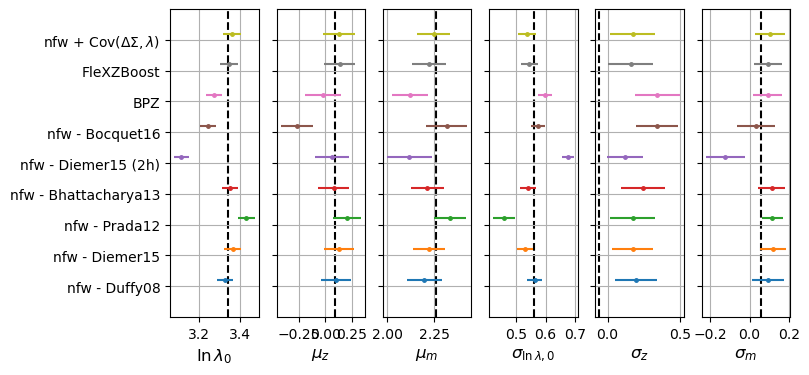

In [16]:
labels_params = [r'$\ln \lambda_0$', r'$\mu_z$', r'$\mu_m$', r'$\sigma_{\ln \lambda, 0}$', r'$\sigma_z$', r'$\sigma_m$']
fig, ax = plt.subplots(1, 6, sharey = True, figsize=(8,4))
color = [f'C{n:.0f}' for n in range(100)]
for i in range(len(p_MN)):
    for j in range(6):
            ax[j].errorbar(np.array(p_MN[i])[j], list(name_plot).index(name_plot_MN[i]) + 0.2, xerr = np.array(p_err_MN[i])[j], 
                           markersize=5, marker='.',  color =color[i])
            #ax[j].errorbar(np.array(p_M[i])[j], list(name_plot).index(name_plot_M[i]) + 0, xerr = np.array(p_err_M[i])[j], 
            #               markersize=5,  marker='.',  color =color[i], capsize=5)
            #ax[j].errorbar(np.array(p_N[i])[j], list(name_plot).index(name_plot_N[i]) - 0.2, xerr = np.array(p_err_N[i])[j], 
            #           markersize=5, marker='.',  color =color[i])
    
for j in range(6):
         ax[j].vlines(fiducial_params[str(j)], -1, 10 , zorder=0, color = 'k', ls="--")
         ax[j].set_xlabel(labels_params[j], fontsize=12)
         ax[j].grid(True)
ax[0].set_ylim(-1, len(p_MN))
ax[0].set_yticks(index_plot)
ax[0].set_yticklabels(name_plot)
plt.savefig('../fig/mcmc_scaling_relation_M.png',bbox_inches='tight', dpi=300)